In [1]:
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('ALYA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-09-27,13.750,14.250,13.375,14.000,10.373874,4653200
1,1996-09-30,13.750,14.750,13.750,14.125,10.466497,852400
2,1996-10-01,14.125,14.125,13.625,13.875,10.281250,283100
3,1996-10-02,13.875,13.875,13.250,13.750,10.188626,403200
4,1996-10-03,13.875,14.375,13.375,14.125,10.466497,316200
...,...,...,...,...,...,...,...
5912,2020-03-26,1.710,1.750,1.710,1.740,1.740000,800
5913,2020-03-27,1.750,1.810,1.720,1.760,1.760000,11700
5914,2020-03-30,1.830,1.830,1.720,1.750,1.750000,9900
5915,2020-03-31,1.750,1.760,1.740,1.740,1.740000,6900


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop(columns='Date', inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,13.750,14.250,13.375,14.000,10.373874,4653200,1996,9,27
1,13.750,14.750,13.750,14.125,10.466497,852400,1996,9,30
2,14.125,14.125,13.625,13.875,10.281250,283100,1996,10,1
3,13.875,13.875,13.250,13.750,10.188626,403200,1996,10,2
4,13.875,14.375,13.375,14.125,10.466497,316200,1996,10,3
...,...,...,...,...,...,...,...,...,...
5912,1.710,1.750,1.710,1.740,1.740000,800,2020,3,26
5913,1.750,1.810,1.720,1.760,1.760000,11700,2020,3,27
5914,1.830,1.830,1.720,1.750,1.750000,9900,2020,3,30
5915,1.750,1.760,1.740,1.740,1.740000,6900,2020,3,31


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5917 entries, 0 to 5916
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5917 non-null   float64
 1   High       5917 non-null   float64
 2   Low        5917 non-null   float64
 3   Close      5917 non-null   float64
 4   Adj Close  5917 non-null   float64
 5   Volume     5917 non-null   int64  
 6   Year       5917 non-null   int32  
 7   Month      5917 non-null   int32  
 8   Day        5917 non-null   int32  
dtypes: float64(5), int32(3), int64(1)
memory usage: 346.8 KB


In [6]:
# Standardize the data
features = df[['Open', 'High', 'Low', 'Close', 'Volume']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# K MEANS

In [7]:
kmeans = KMeans(n_clusters=2, random_state=42)  # Number of clusters to create, adjust as needed

# Fitting the KMeans model to the scaled data
kmeans.fit(scaled_features)

# Adding cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Checking the distribution of data points among clusters
cluster_counts = df['Cluster'].value_counts()
print(cluster_counts)
# Summary statistics for each cluster (optional)
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

Cluster
0    5497
1     420
Name: count, dtype: int64
              Open       High        Low      Close  Adj Close         Volume  \
Cluster                                                                         
0         5.589509   5.721069   5.456920   5.602732   4.199804   47366.454430   
1        29.109077  29.768415  28.363542  29.055580  21.529923  222848.809524   

                Year     Month        Day  
Cluster                                    
0        2008.779152  6.512279  15.737129  
1        1997.700000  6.969048  15.783333  


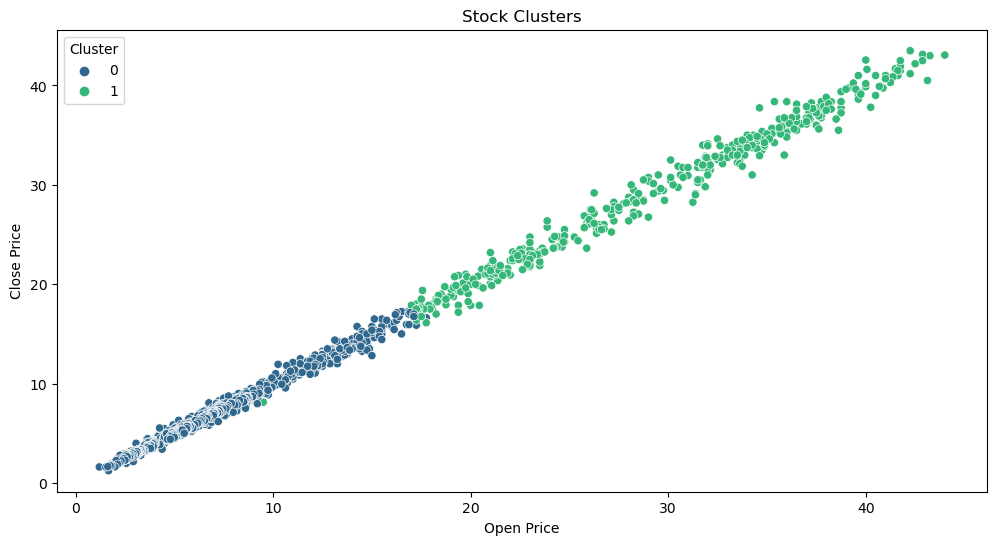

In [8]:
# Visualize the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Open', y='Close', hue='Cluster', data=df, palette='viridis')
plt.title('Stock Clusters')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()

In [9]:
silhouette_avg = silhouette_score(scaled_features, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.8283912956543905


# HIERARCHICAL CLUSTERING

In [10]:
n_clusters = 4 # Number of clusters
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
cluster.fit_predict(df)


array([0, 3, 1, ..., 2, 2, 2], dtype=int64)

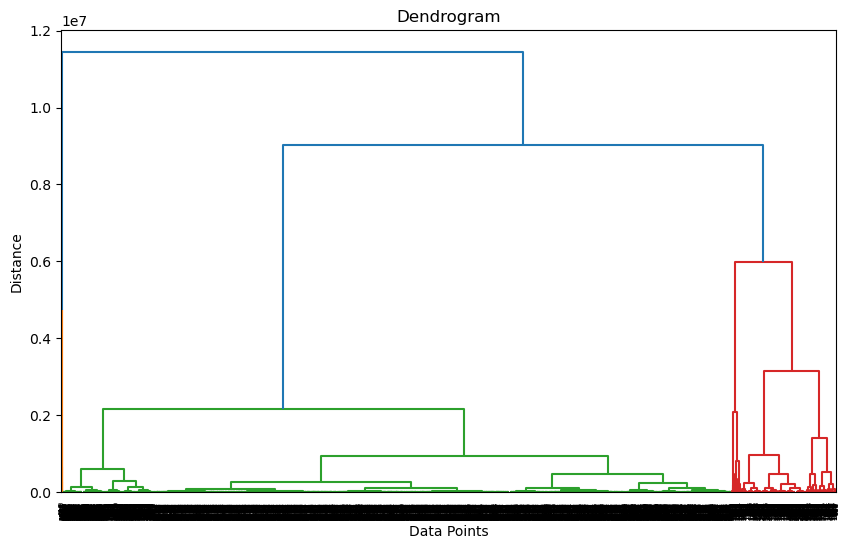

In [13]:
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [14]:
Z = sch.linkage(df, method='ward')

# Calculate cophenetic correlation coefficient
c, coph_dists = sch.cophenet(Z, sch.distance.pdist(df))
print(f"Cophenetic Correlation Coefficient: {c}")

Cophenetic Correlation Coefficient: 0.5462799703059898


# GAUSSIAN MIXTURE MODEL

In [18]:
# To plot the GMM
pca = PCA(n_components=2)
data_2d = pca.fit_transform(df)


n_components = 3  # Adjust the number of components as needed
gmm = GaussianMixture(n_components=n_components, random_state=42)

# Fit the GMM to your data
gmm.fit(df)

# Get the predicted labels or cluster assignments
predicted_labels = gmm.predict(df)

df['Cluster'] = predicted_labels

# Display the cluster assignments
print(df['Cluster'].value_counts())

Cluster
1    5016
0     894
2       7
Name: count, dtype: int64


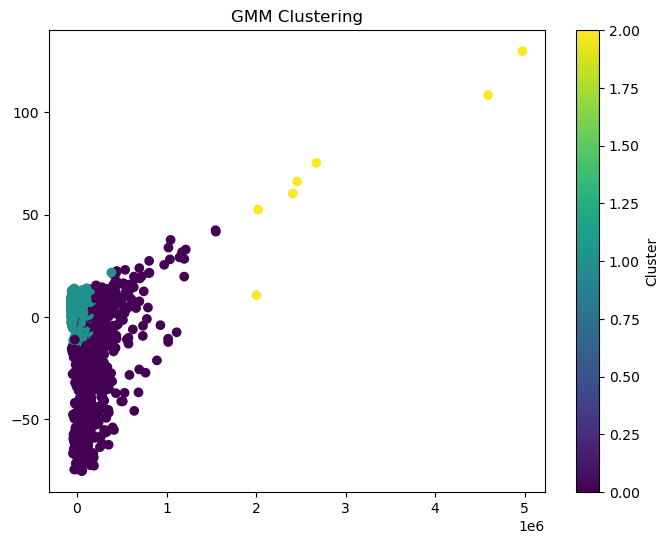

In [19]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=predicted_labels, cmap='viridis')
plt.title('GMM Clustering')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [20]:
silhouette_avg = silhouette_score(data_2d, predicted_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6816982288975452


# DBSCAN CLUSTERING

DBSCAN_Cluster
 0    5908
-1       9
Name: count, dtype: int64


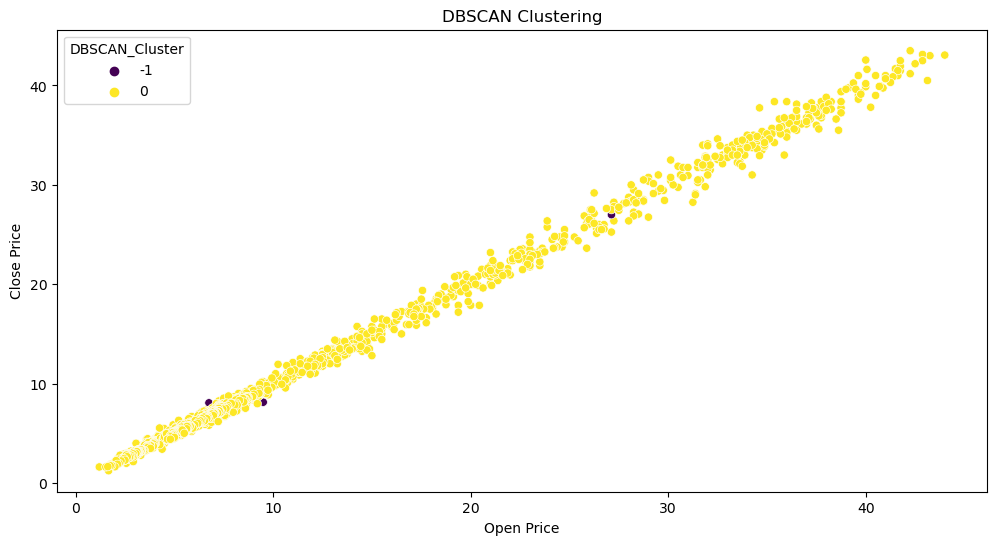

DBSCAN Silhouette Score: 0.8931816577260578


In [26]:
from sklearn.cluster import DBSCAN

# Hyperparameters
eps_value = 2  # The maximum distance between two samples for one to be considered as in the neighborhood of the other
min_samples_value = 4  # The number of samples (or total weight) in a neighborhood for a point to be considered as a core point

# Create and fit DBSCAN model
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)

# Display the cluster assignments
print(df['DBSCAN_Cluster'].value_counts())

# Visualize the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Open', y='Close', hue='DBSCAN_Cluster', data=df, palette='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()

# Silhouette Score
silhouette_avg_dbscan = silhouette_score(scaled_features, df['DBSCAN_Cluster'])
print(f"DBSCAN Silhouette Score: {silhouette_avg_dbscan}")


# MEANSHIFT

MeanShift_Cluster
0    5491
1     413
2       7
4       4
3       2
Name: count, dtype: int64


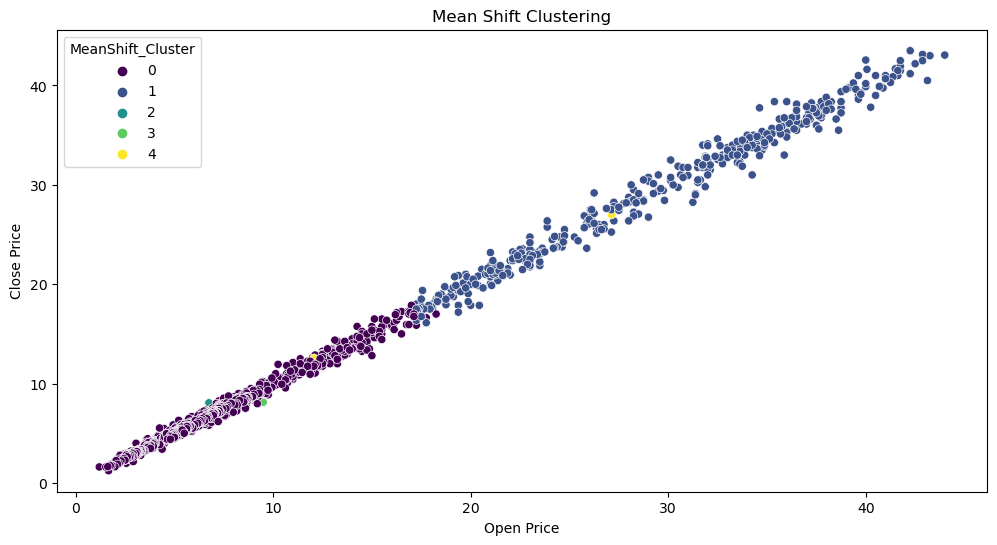

Mean Shift Silhouette Score: 0.8283783757867799


In [33]:
from sklearn.cluster import MeanShift

# Hyperparameter
bandwidth_value = 3 # The bandwidth parameter influences the number of clusters

# Create and fit Mean Shift model
mean_shift = MeanShift(bandwidth=bandwidth_value)
df['MeanShift_Cluster'] = mean_shift.fit_predict(scaled_features)

# Display the cluster assignments
print(df['MeanShift_Cluster'].value_counts())

# Visualize the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Open', y='Close', hue='MeanShift_Cluster', data=df, palette='viridis')
plt.title('Mean Shift Clustering')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()

# Silhouette Score
silhouette_avg_mean_shift = silhouette_score(scaled_features, df['MeanShift_Cluster'])
print(f"Mean Shift Silhouette Score: {silhouette_avg_mean_shift}")


# AGGLOMERATIVE CLUSTERING

Agglomerative_Cluster
0    5915
1       2
Name: count, dtype: int64


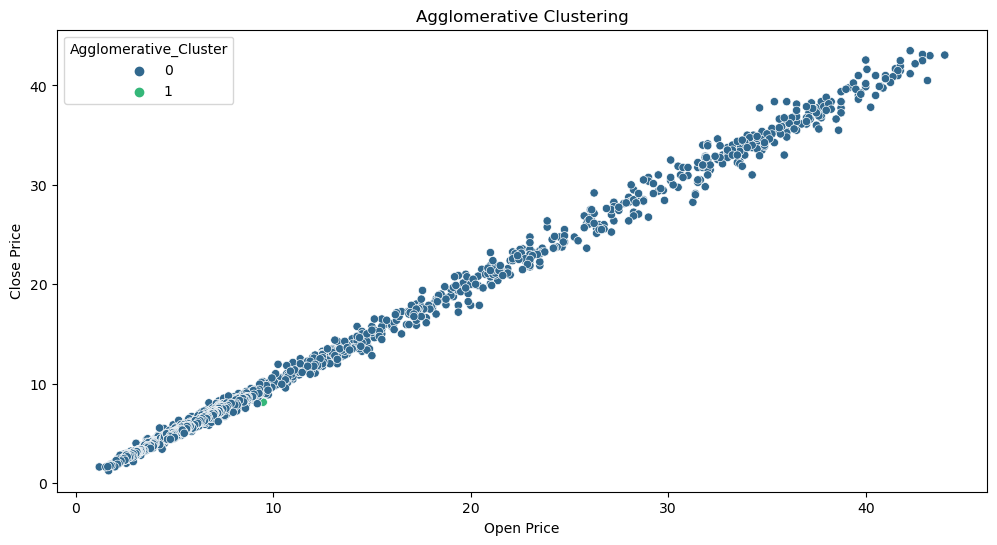

Agglomerative Silhouette Score: 0.938028161785123


In [74]:
from sklearn.cluster import AgglomerativeClustering

# Hyperparameters
n_clusters_value = 2  # Number of clusters
linkage_method = 'average'  # Linkage method (ward, complete, average, etc.)

# Create and fit Agglomerative Clustering model
agglomerative = AgglomerativeClustering(n_clusters=n_clusters_value, linkage=linkage_method)
df['Agglomerative_Cluster'] = agglomerative.fit_predict(scaled_features)

# Display the cluster assignments
print(df['Agglomerative_Cluster'].value_counts())

# Visualize the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Open', y='Close', hue='Agglomerative_Cluster', data=df, palette='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()

# Silhouette Score
silhouette_avg_agglomerative = silhouette_score(scaled_features, df['Agglomerative_Cluster'])
print(f"Agglomerative Silhouette Score: {silhouette_avg_agglomerative}")
